/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5223 - loss: 0.7546 - val_accuracy: 0.5688 - val_loss: 0.6885
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5521 - loss: 0.7029 - val_accuracy: 0.5656 - val_loss: 0.6871
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5406 - loss: 0.6822 - val_accuracy: 0.5656 - val_loss: 0.6902
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5950 - loss: 0.6696 - val_accuracy: 0.5531 - val_loss: 0.6944
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6176 - loss: 0.6603 - val_accuracy: 0.5375 - val_loss: 0.6987
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6332 - loss: 0.6525 - val_accuracy: 0.5281 - val_loss: 0.7029
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6443 - loss: 0.6455 - val_accuracy: 0.5250 - val_loss: 0.7069
Epoch 8/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6466 - loss: 0.6388 - val_accuracy: 0.5344 - val_

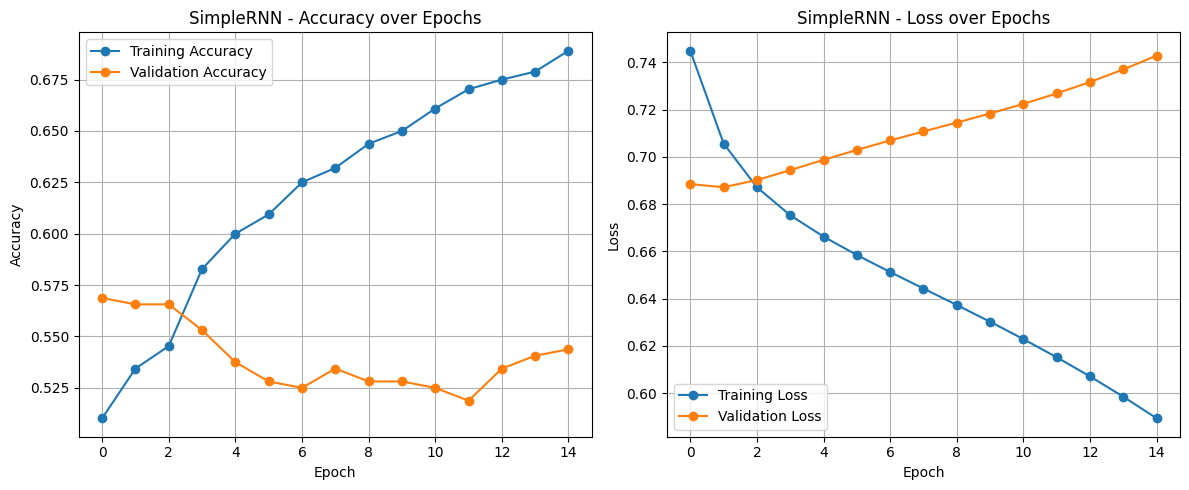


Observation:
- SimpleRNN learned from the sequential data.
- Training and validation graphs show learning trend.
- If overfitting is seen, regularization or more data may help.


In [1]:
# 1. Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# 2. Generate a synthetic sequential dataset
num_samples = 2000
timesteps = 20
features = 10

X = np.random.randn(num_samples, timesteps, features)
y = np.random.randint(2, size=(num_samples, 1))

# 3. Preprocess and normalize the dataset
X = X.reshape(-1, features)
X = StandardScaler().fit_transform(X)
X = X.reshape(num_samples, timesteps, features)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Build the SimpleRNN model
model = Sequential([
    SimpleRNN(32, activation='tanh', input_shape=(timesteps, features)),
    Dense(1, activation='sigmoid')
])

# 5. Compile and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2, verbose=1)

# 6. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

# 7. Plot training history (accuracy and loss)
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('SimpleRNN - Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('SimpleRNN - Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# 8. Observation
print("\nObservation:")
print("- SimpleRNN learned from the sequential data.")
print("- Training and validation graphs show learning trend.")
print("- If overfitting is seen, regularization or more data may help.")
